In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Read data using the `read_html` method from the table "Birth Rate in Ukrainian Regions (1950-2019)" from provided links.

In [2]:
#Using read_csv instead of read_html because of old link
df = pd.read_csv("html_data.csv")

## 2. Display the first rows of the table using the `head` method.

In [3]:
df.head()

,regions,2011,2012,2013,2015,2017,2019,2021
0,Autonomous Republic of Crimea,1.56,1.68,1.66,_,_,_,_
1,Vinnytsia region,1.53,1.59,1.53,1.5,1.36,1.2,1.14
2,Volyn region,1.81,1.92,1.86,1.74,1.62,1.48,1.45
3,Dnipropetrovsk region,1.44,1.52,1.51,1.48,1.29,1.11,1.03
4,Donetsk region,1.27,1.34,1.32,_,_,_,_


## 3. Define the number of rows and columns in the dataset (use the `shape` attribute).

In [4]:
df.shape

(27, 8)

## 4. Replace the `"—"` value in the table with NaN.

In [5]:
df.replace("_", pd.NA, inplace=True)
df

,regions,2011,2012,2013,2015,2017,2019,2021
0,Autonomous Republic of Crimea,1.56,1.68,1.66,<NA>,<NA>,<NA>,<NA>
1,Vinnytsia region,1.53,1.59,1.53,1.5,1.36,1.2,1.14
2,Volyn region,1.81,1.92,1.86,1.74,1.62,1.48,1.45
3,Dnipropetrovsk region,1.44,1.52,1.51,1.48,1.29,1.11,1.03
4,Donetsk region,1.27,1.34,1.32,<NA>,<NA>,<NA>,<NA>
5,Fatigue region,1.65,1.71,1.68,1.6,1.42,1.23,1.14
6,Transcarpathian region,1.87,1.95,1.93,1.82,1.64,1.52,<NA>
7,Zaporizhia region,1.37,1.46,1.43,1.39,1.25,1.09,<NA>
8,Ivano-Frankivsk region,1.55,1.63,1.60,1.54,1.36,1.28,1.15
9,Kyiv region,1.58,1.67,1.64,1.65,1.41,2.15,1.07


## 5. Define the types of all columns using `dataframe.dtypes`.

In [6]:
df.dtypes

regions     object
2011        object
2012       float64
2013       float64
2015        object
2017        object
2019        object
2021        object
dtype: object

## 6. Change the types of non-numeric columns to numeric. Hint: these are columns that contained the `"—"`.

In [7]:
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dtypes

regions     object
2011       float64
2012       float64
2013       float64
2015       float64
2017       float64
2019       float64
2021       float64
dtype: object

## 7. Calculate the proportion of empty places in each column (use `isnull` and `sum` methods).

In [8]:
df.isnull().sum() / len(df)

regions    0.000000
2011       0.037037
2012       0.000000
2013       0.000000
2015       0.148148
2017       0.148148
2019       0.148148
2021       0.407407
dtype: float64

## 8. Remove data for the entire country, which is the last row of the table.

In [9]:
df = df[:-1]
df.shape

(26, 8)

## 9. Place missing data in columns with average values of those columns (using `fillna`).

In [10]:
for col in df.columns[1:]:
    df.loc[:,col] = df[col].fillna(df[col].mean())
df

,regions,2011,2012,2013,2015,2017,2019,2021
0,Autonomous Republic of Crimea,1.5600,1.68,1.66,1.52087,1.374783,1.258696,1.15625
1,Vinnytsia region,1.5300,1.59,1.53,1.50000,1.360000,1.200000,1.14000
2,Volyn region,1.8100,1.92,1.86,1.74000,1.620000,1.480000,1.45000
3,Dnipropetrovsk region,1.4400,1.52,1.51,1.48000,1.290000,1.110000,1.03000
4,Donetsk region,1.2700,1.34,1.32,1.52087,1.374783,1.258696,1.15625
5,Fatigue region,1.6500,1.71,1.68,1.60000,1.420000,1.230000,1.14000
6,Transcarpathian region,1.8700,1.95,1.93,1.82000,1.640000,1.520000,1.15625
7,Zaporizhia region,1.3700,1.46,1.43,1.39000,1.250000,1.090000,1.15625
8,Ivano-Frankivsk region,1.5500,1.63,1.60,1.54000,1.360000,1.280000,1.15000
9,Kyiv region,1.5800,1.67,1.64,1.65000,1.410000,2.150000,1.07000


## 10. Obtain a list of regions where the birth rate in 2019 was higher than the average for Ukraine.

In [11]:
mean_birth_rate_2019 = df['2019'].mean()
high_birth_rate_regions = df[df['2019'] > mean_birth_rate_2019]['regions'].tolist()
high_birth_rate_regions

['Volyn region',
 'Transcarpathian region',
 'Ivano-Frankivsk region',
 'Kyiv region',
 'Lviv region',
 'Odessa region',
 'Rivne region',
 'Kherson region',
 'Khmelnytsky region',
 'Chernivtsi region',
 'city of Kyiv']

## 11. Which region had the highest birth rate in 2015?

In [12]:
df.loc[df['2015'].idxmax()]['regions']

'Rivne region'

## 12. Build a bar chart of the birth rate by regions for 2019.

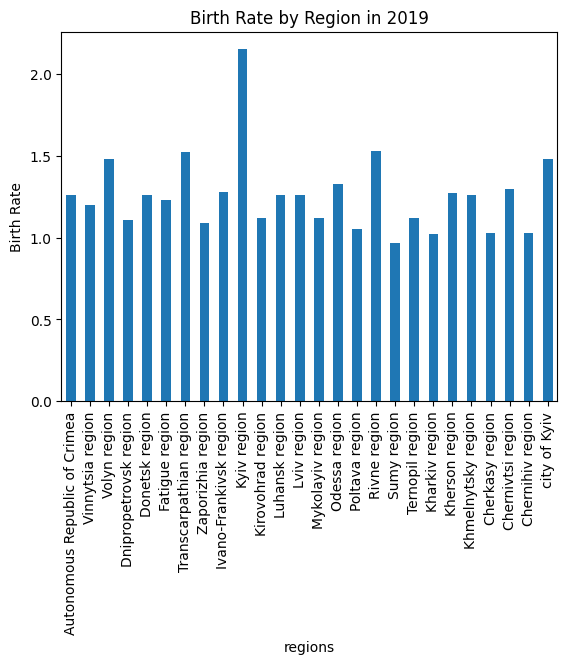

In [13]:
df.set_index('regions')['2019'].plot(kind='bar')
plt.ylabel('Birth Rate')
plt.title('Birth Rate by Region in 2019')
plt.show()

## 13. Add 3 to 5 charts of different types. Style your charts appropriately so that each chart in the homework is distinct from the others. You can use matplotlib or seaborn.

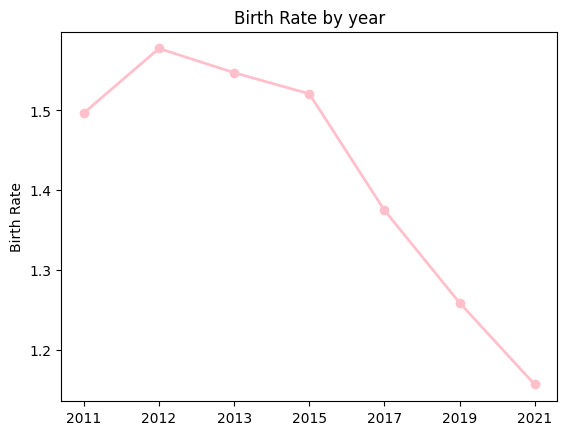

In [14]:
average_birth_rate = [df[col].mean() for col in df.columns[1:]]
plt.ylabel('Birth Rate')
plt.title('Birth Rate by year')
plt.plot(df.columns[1:],average_birth_rate, linewidth=2, marker="o", color="pink")
plt.show()

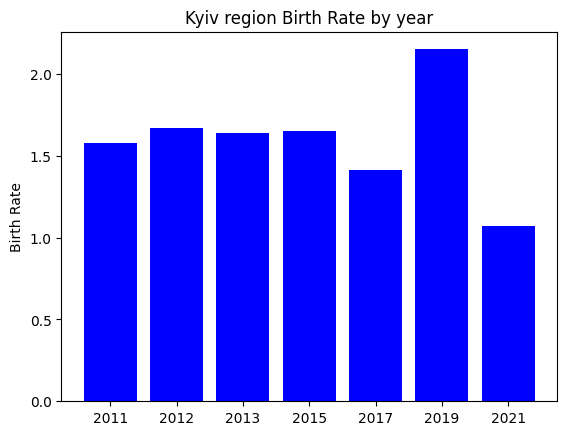

In [15]:
kyiv_region_birth_rate = df[df['regions'] == 'Kyiv region']
kyiv_region_birth_rate = kyiv_region_birth_rate.iloc[0, 1:].tolist()
plt.ylabel('Birth Rate')
plt.title('Kyiv region Birth Rate by year')
plt.bar(df.columns[1:],kyiv_region_birth_rate, color="b")
plt.show()


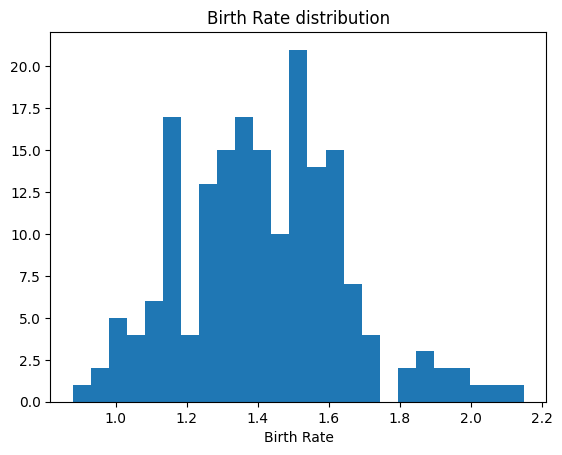

In [16]:
all_values = pd.concat([df[col] for col in df.columns[1:]]).tolist()
plt.xlabel('Birth Rate')
plt.title('Birth Rate distribution')
plt.hist(all_values,bins=25)
plt.show()